# Introduction


- Statistics is the study of how best to collect, analyze, and draw conclusions from data.
- In this notes, we will work on a python object known as a `dataframe`. It's a tabular data similar to that of excel. An example data is shown below.
- This is not a python tutorial, it's introductory statistics with some of the applications in Python.
- You can run this jupyter notebook on the cloud by going to <a href="https://mybinder.org/v2/gh/benjcabalona1029/DETC-Workshop/master">this</a>  link and choosing the appropriate file name.

In [1]:
# This is just for some settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('sales.csv')
data.head(10)

,Sales,Advertising,Season
0,2741.091348,1014.559605,0
1,1940.775825,790.564398,1
2,2947.421974,1104.859227,0
3,3758.135236,803.407361,0
4,2807.736707,797.194371,0
5,1356.145742,838.751170,0
6,3708.851744,1101.761696,0
7,2866.364644,780.641034,1
8,3500.841560,957.627052,0
9,4257.200342,1125.455506,0


## Types of Data

- Numeric Data
 - Discrete : Something that can be counted. Some examples are number of balls owned, number of children in a household etc.
 - Continuous : Real-Valued. Contains rational or irrational numbers. Some examples are house prices, temperature etc.
 
- Categorical Data
 - Nominal : It's a type of a categorical variable that has no inherent order in it. Some examples are color of the cars, male or females, different countries, names etc.
 - Ordinal : It's a type of categorical variable that has a specific order in it. Some example are, rankings (Good, Better, Best) (Agree, Neutral, Disagree) etc.
 
 
 
## Measure of Central Tendency

- As the name implies, it gives us a numerical summary of the data. Specifically it tells us the center of the data.
- It's easiest to think about measure of central tendency as 'different types of averages'.

### Mean

- The mean is the easiest, and you have probably used the mean before. It is simply the "sum of all the data divided by the number of data" or more formally as below: 
$$\bar{x} = \sum_{i=1}^{n} \frac{x_i}{n}$$

Going back to our example data above, this is how we *Mean* of the `Sales` column.

In [3]:
data['Sales'].mean()

3292.6012293132967

### Median

- Is the middle value.
- Steps to get the median:
 - Sort the data.
 - If the number of datapoints is odd, the median is the middle value.
 - If the number of datapoints is even, take the mean of the 2 middle values.
 
Let me give an example to clear that up. Suppose we have the dataset below:

Height = [163, 158, 149, 144, 160]

Step 1 - Sort the data : <br>
[144, 149, 158, 160, 163] <br>
Step 2 - Since there are 5 datapoints, the median is simply the middle value, which is 158.

Weight = [53, 62, 49, 44]

Step 1 - Sort the data: <br>
[44, 49, 53, 62] <br>
Step 2 - Since there are 4 datapoints, we need to take the mean of `49` and `53`. Therefore the median is 51.

Similar to the above code, this is how we get the median of the `Sales` column.

In [4]:
data['Sales'].median()

3300.597735345358

### Mode

- The mode is the most frequent value. If there are 2 most frequent value, then we say that the data is *bimodal*. In general, if there are more than 2 most frequent value we say that the data is *multimodal*.

Example :

Pebbles = [6, 3, 9, 6, 6, 5, 9, 3] <br>
The mode is 6. (it occurs most often).

Pebbles = [1,1,2,2,4,5,6] <br>
The modes are 1 and 2.

Note that Mode only makes sense if the data is either Categorical or Discrete.


### When to use Median or Mode?

If there is an 'outlier' in the dataset, use the median (Or if the dataset is *skewed*) Let me illustrate this with an example.

In [5]:
salary = [10000,14000,13000,50000]

In [6]:
#Suppose you used the mean
print('mean',sum(salary)/len(salary))

mean 21750.0


Is 21,750 really the average salary ?

In [7]:
# Suppose you used the median

data_1 = pd.DataFrame()
data_1['salary'] = salary
print('median',data_1['salary'].median(),'This makes more sense.')

median 13500.0 This makes more sense.


## Measure of Spread

### Variance and Standard Deviation

- Variance measures how much each data point deviates from the mean. Numerically, this is given by :$$\sigma^2 = \sum_{i=1}^{n} \frac{(x_i-\bar{x})^2}{n-1}$$

One issue with the variance is that, it's unit is squared, and that's something that is hard to interpret. We can take it's square root, and we will get the *standard deviation* denoted by $\sigma.$

Let's print the Variance and Standard deviation from a Pandas DataFrame.

In [8]:
print('Variance:',(data['Sales'].std())**2)
print('Standard Deviation:',data['Sales'].std())

Variance: 883034.7884363923
Standard Deviation: 939.6993074576528


Below is the quick Python command to display the quick summary statistics of a dataframe.

In [9]:
data.describe()

,Sales,Advertising,Season
count,500.000000,500.000000,500.000000
mean,3292.601229,1007.219303,0.272000
std,939.699307,255.556420,0.445436
min,243.342237,351.805274,0.000000
25%,2672.736612,828.484271,0.000000
50%,3300.597735,1002.320382,0.000000
75%,3896.906729,1192.226940,1.000000
max,5976.264097,1918.032460,1.000000


## A Primer on Visualizing Data
 
 
 Often times, we are concerned on:
 
 - The structure of the data.
 - How different types of data changes with eact other.
 
And of course, there are analytical ways to describe the above scenarios but most of the times, we can answer it by simply plotting the data.

### Histogram

- Univariate (Single Variable at a time)
- Shows the distribution of your data by binning it. The taller the bin means more observations lie on that bin.

You can watch  <a href="https://www.youtube.com/watch?v=qBigTkBLU6g">this</a>  excellent video from StatQuest for more explanation.

In [10]:
import seaborn as sns

sns.set(style='darkgrid')

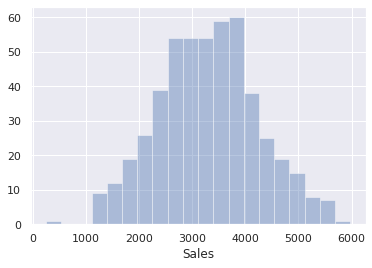

In [11]:
sns.distplot(data['Sales'],bins=20,kde=False)

### Boxplot

- The isolated points are outliers.
- The middle line represents the median.

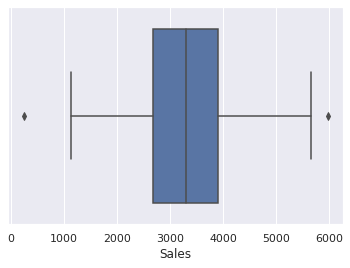

In [12]:
sns.boxplot(data['Sales'])

### Scatterplot

- Shows relationship between two numeric variables.

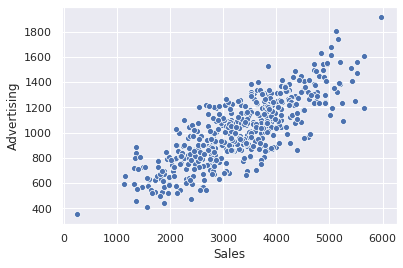

In [13]:
sns.scatterplot(data['Sales'],data['Advertising'])

### Barplot

- Shows relationship between between
- Two Categorical Variables
- Categorical and Numeric

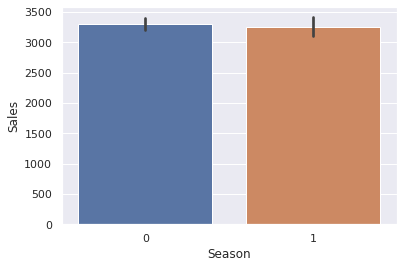

In [14]:
sns.barplot(x=data['Season'],y=data['Sales'])

**Note** To make it more clear, let me show you how the same information from the barplot can be achieved numerically using a pivot table.

In [15]:
pd.pivot_table(index='Season',values='Sales',aggfunc=np.mean,data=data)

,Sales
Season,
0,3304.708296
1,3260.197023


Knowing the above concept can actually take you far. In most practical cases, those simple calculations are enough to get meaningful insights from data. I recommend to watch <a href="https://www.youtube.com/watch?v=f2Pb0X0LfLo&t=630s">this</a>  youtube video by Isaac Reyes to learn more about effective data visualization.

# Introduction to Inference

The material will be based on the book from OpenIntro Statistics. 
The book is free and you can download it from <a href="https://www.openintro.org/book/os/">here.</a> 

The examples that we will be using are different but the above book is an excellent introductory textbook.


## Variability in Estimates

Consider the dataset below. It shows the income of 200 Data Scientist in Metro Manila. Using the said data, we wish to answer the Question: 

"What is the average income of a "Data Scientist" working in Metro Manila?"

**Note** Don't worry about the code below. It's just for simulating a dataset.

,Data Scientist
0,49666.268047
1,58072.405364
2,63548.175114
3,55073.029609
4,59209.254099
5,59306.730856
6,76658.863951
7,70590.799779


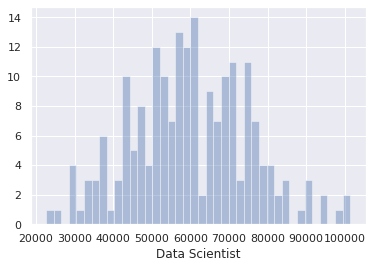

In [16]:
def create_data():
    x = np.random.normal(60000,15000,200)
    income = pd.DataFrame()
    income['Data Scientist'] = x
    return income

income = create_data()
income.head(8)
sns.distplot(income['Data Scientist'],kde=False,bins=40)


### Point Estimates

We wanted to estimate the average income of the entire data scientists in Metro Manila. In other words, we wanted to estimate the **population mean** using the data that we have. The most intuitive way to do this is by taking the **sample mean** (i.e. the mean income based on our data.) We can simply do that by:

In [17]:
income['Data Scientist'].mean()

59957.9622768733

Note that the data is simulated. And the underlying distribution has a mean of 60,000. Notice how close our estimate is!

Suppose that we get another sample of income (In fact you can do that by re running the cell or the entire notebook).  We are not likely to get the EXACT same result.  Estimates generally vary from one sample to another, and this **sampling variation** suggests our estimate may be close, but it will not be exactly equal to the parameter.

### Standard Error

Suppose that we took another set of income and compute its mean: 59024.85582383834, and another set of income and compute its mean: 61010.14615678205. If we keep doing this (say a thousand times), we will obtain a **sampling distribution** of the sample mean. We will do this and then we will plot the result.

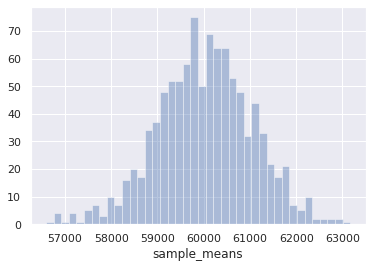

In [18]:
sample_means = []
for i in range(1,1001):
    y = create_data()
    sample_means.append(y['Data Scientist'].mean())
    
sampling_distribution = pd.DataFrame()
sampling_distribution['sample_means'] = sample_means
sns.distplot(sampling_distribution['sample_means'],kde=False,bins=40)

More formally, the sampling distribution will follow a **Normal Distribution** with a mean equal to the POPULATION MEAN. This is true by the central limit theorem. The standard deviation of the sampling distribution is called the **standard error.**


The standard error can be approximated by the sample standard deviation divided by $\sqrt{n}$ and the estimate tends to be good if n > 30.

The proof of the above is beyond the scope of this introductory notes, other details is discussed in the book.


**Note** We have only discuss the SE of the mean, but just know that almost every point estimate has their corresponding SE.

So far, we have discussed the following points:

- Point Estimates can be used to estimate the population parameter.
- The estimates are not exact.
- We quantified the uncertainty of the sample mean using what we call the standard error.

### Confidence Interval
Instead of supplying just a point estimate of a parameter, a next logical step would be to provide a plausible range of values for the parameter called the *Confidence Interval*.

Remember from above, we highlighted that the main take away is that SE is simply the standard deviation of the sampling distribution, now this is where it becomes useful. Since the sampling distribution follows a Normal Distribution, we know that roughly 95% of the time the point estimates (sample means) will be within 2 standard errors of the true (population) mean. Mathematically that is $$\mu \pm 2 \cdot SE$$

To really drive the point, let us compute that in Python.

In [21]:
sample_mean = income['Data Scientist'].mean()
sample_std = income['Data Scientist'].std()
standard_error = sample_std / (np.sqrt(income.shape[0]))
print('Mean',sample_mean)
print('Std',sample_std)
print('Standard Error',standard_error)
print('(',sample_mean-2*standard_error,',',sample_mean+2*standard_error,')')
print('Using 1.96 tends to have better approximation:')
print('(',sample_mean-1.96*standard_error,',',sample_mean+1.96*standard_error,')')

Mean 59957.9622768733
Std 15380.919779042082
Standard Error 1087.595267664695
( 57782.77174154391 , 62133.152812202694 )
Using 1.96 tends to have better approximation
( 57826.2755522505 , 62089.6490014961 )


In [20]:
# Sanity Check
import scipy.stats as st
se = st.sem(income['Data Scientist'])
a = st.norm.interval(0.95, loc=sample_mean, scale=standard_error)
print(a)

(57826.3147224943, 62089.6098312523)


Note that the small discrepancy above is mostly due to numerical precision.

### Hypothesis Testing

- Is a statistical technique used to evaluate competing claims using data.
- The null hypothesis usually takes a stance of no  difference or no  effect. 
- (**More formally**) We reject a null hypothesis depending if its *p-value* is less than a set significance level called $\alpha.$ Otherwise, we fail to reject the null hypothesis. We will discuss this further in the next section.
 - The p-value is the probability of observing data at least as favorable to the alternative hypothesis as our current data set, if the null hypothesis were true.
- We present an example below that captures the essence of Hypothesis Testing.
 
**Example** <br>
Suppose there was a HR company that claimed that the average salary of a Data Scientist in Metro Manila is 50,000. We wanted to check if our sampled data provides strong evidence to disprove the HR company's claim.

To answer the above question, we will label the two competing claims $H_0$ and $H_A$:

$H_0$ (Null Hypothesis) : Our sampled data was the same as the reported average salary of 50,000.

$H_A$ (Alternative Hypothesis) : Our sampled data **is not** the same as the reported average salary.

We will basically re-run the code above to generate the 95% confidence interval, and check if 50,000 is in that interval. Since it's not, therefore we reject the null hypothesis, and indeed our sampled data is not the same as the reported average.